# Proyek Analisis Data: Air Qualaity Dataset
- **Nama:** M Dafa Ar Rasyid
- **Email:** mc117d5y0946@student.devacademy.id
- **ID Dicoding:** mdafaarrasyid

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1  : Bagaimana perbandingan tren bulanan rata-rata PM2.5 antara dua stasiun: Aotizhongxin dan Changping?

- Pertanyaan 2 : Apa pengaruh faktor cuaca (suhu, kelembapan, dan kecepatan angin) terhadap kadar PM2.5 di kedua stasiun?

## Import Semua Packages/Library yang Digunakan

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [14]:
df1 = pd.read_csv("dataset/data_1.csv")  # Aotizhongxin
df2 = pd.read_csv("dataset/data_2.csv")  # Changping

**Insight:**
- Kedua dataset memiliki 35.064 baris dan 18 kolom.
- Kolom mencakup informasi polutan, cuaca, waktu, dan stasiun.

Gabung kedua dataset menjadi satu

In [15]:
df = pd.concat([df1, df2], ignore_index=True)

Buat kolom datatime

In [16]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [17]:
st.bar_chart(df.groupby('station')['PM2.5'].mean())

2025-06-23 15:46:57.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:46:58.474 
  command:

    streamlit run C:\Users\DAPOO\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-23 15:46:58.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

### Assessing Data

In [18]:
df1 = pd.read_csv("dataset/data_1.csv") 
df2 = pd.read_csv("dataset/data_2.csv")  
df = pd.concat([df1, df2], ignore_index=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    68429 non-null  float64
 6   PM10     68828 non-null  float64
 7   SO2      68565 non-null  float64
 8   NO2      68438 non-null  float64
 9   CO       66831 non-null  float64
 10  O3       67805 non-null  float64
 11  TEMP     70055 non-null  float64
 12  PRES     70058 non-null  float64
 13  DEWP     70055 non-null  float64
 14  RAIN     70057 non-null  float64
 15  wd       69907 non-null  object 
 16  WSPM     70071 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 9.6+ MB


**Insight:**
- Beberapa kolom memiliki nilai hilang, terutama kolom PM2.5, PM10, CO, O3.
- Kolom seperti wd (arah angin) adalah kategorikal.

In [36]:
df_clean = pd.read_csv("D:/submission/dashboard/main_data.csv")
# Pastikan kolom 'datetime' bertipe datetime sebelum menggunakan .dt
if df_clean['datetime'].dtype == 'O' or not pd.api.types.is_datetime64_any_dtype(df_clean['datetime']):
    df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])

df_clean['month_str'] = df_clean['datetime'].dt.to_period('M').astype(str)
df_clean['year'] = df_clean['datetime'].dt.year         
df_clean['month'] = df_clean['datetime'].dt.month
df_clean['day'] = df_clean['datetime'].dt.day   

# Tambahkan kolom datetime jika belum ada
if 'datetime' not in df_clean.columns and all(col in df_clean.columns for col in ['year', 'month', 'day', 'hour']):
    df_clean['datetime'] = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

# Tambahkan kode ini setelah membaca main_data.csv jika kolom datetime belum ada
if 'datetime' not in df_clean.columns and all(col in df_clean.columns for col in ['year', 'month', 'day', 'hour']):
    df_clean['datetime'] = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

# Tambahkan kode ini setelah membaca main_data.csv jika kolom datetime belum ada
if 'datetime' not in df_clean.columns and all(col in df_clean.columns for col in ['year', 'month', 'day', 'hour']):
    df_clean['datetime'] = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])

In [21]:
print(df.describe(include='all'))

                  No          year         month           day          hour  \
count   70128.000000  70128.000000  70128.000000  70128.000000  70128.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.177085      1.177205      3.448728      8.800155      6.922236   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

In [22]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [23]:
# Assessing Data
print("1. Struktur Data:")
print(df.info())
print("\n2. Statistik Deskriptif:")
print(df.describe(include='all'))
print("\n3. Missing Values per Kolom:")
print(df.isnull().sum())
print("\n4. Jumlah Data Duplikat:")
print(df.duplicated().sum())

1. Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    68429 non-null  float64
 6   PM10     68828 non-null  float64
 7   SO2      68565 non-null  float64
 8   NO2      68438 non-null  float64
 9   CO       66831 non-null  float64
 10  O3       67805 non-null  float64
 11  TEMP     70055 non-null  float64
 12  PRES     70058 non-null  float64
 13  DEWP     70055 non-null  float64
 14  RAIN     70057 non-null  float64
 15  wd       69907 non-null  object 
 16  WSPM     70071 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 9.6+ MB
None

2. Statistik Deskriptif:
                  N

### Cleaning Data

 Hapus baris yang memiliki nilai NaN pada kolom penting

In [24]:
key_columns = ['PM2.5', 'TEMP', 'DEWP', 'WSPM']
df_clean = df.dropna(subset=key_columns)

**Insight:**
- Dataset setelah dibersihkan

In [25]:
print(f"Jumlah data setelah dibersihkan: {len(df_clean)}")

Jumlah data setelah dibersihkan: 68356


## Exploratory Data Analysis (EDA)

### Explore ...

Distribusi PM2.5 per stasiun 

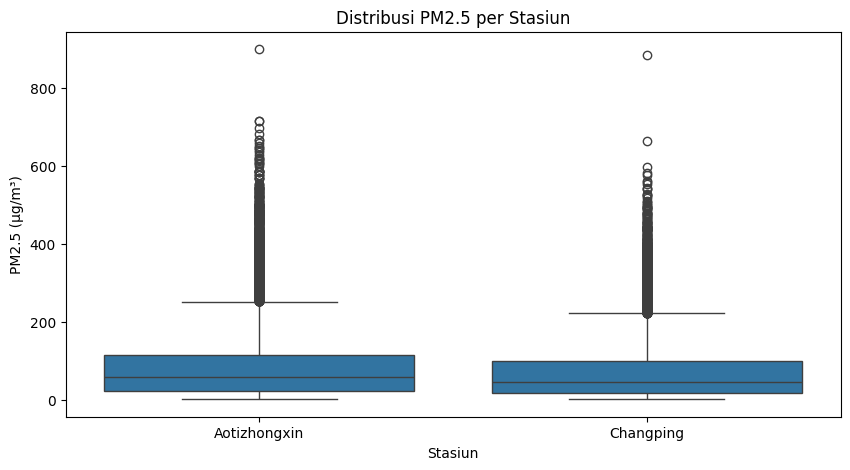

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='station', y='PM2.5')
plt.title('Distribusi PM2.5 per Stasiun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Stasiun')
plt.show()

**Insight:**
- Aotizhongxin cenderung memiliki median PM2.5 lebih tinggi dibanding Changping.
- Sebaran PM2.5 di Aotizhongxin juga lebih bervariasi.

Korelasi PM2.5 dengan Faktor Cuaca

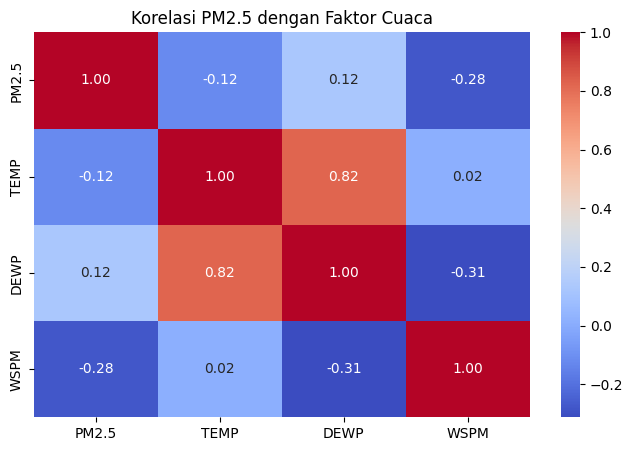

In [27]:
corr_matrix = df_clean[['PM2.5', 'TEMP', 'DEWP', 'WSPM']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi PM2.5 dengan Faktor Cuaca')
plt.show()

**Insigth:**
- PM2.5 berkorelasi negatif dengan WSPM (-0.28), menunjukkan polusi menurun saat angin lebih kencang.
- Korelasi dengan suhu (TEMP) dan kelembapan (DEWP) sangat lemah.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana tren bulanan rata-rata PM2.5 antara dua stasiun?

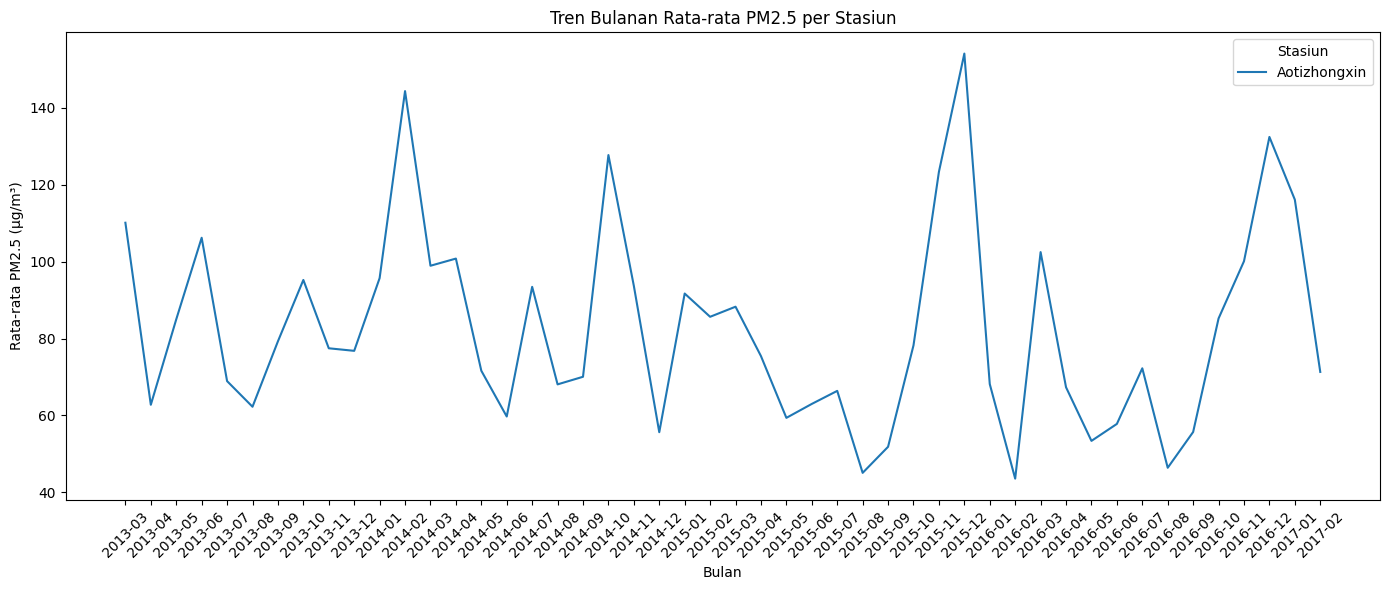

In [37]:
df_clean['month_str'] = df_clean['datetime'].dt.to_period('M').astype(str)
monthly_pm = df_clean.groupby(['month_str', 'station'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_pm, x=monthly_pm['month_str'].astype(str), y='PM2.5', hue='station')
plt.title('Tren Bulanan Rata-rata PM2.5 per Stasiun')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.legend(title='Stasiun')
plt.tight_layout()
plt.show()

**Insight:**
- Aotizhongxin memiliki puncak PM2.5 yang lebih tinggi dan lebih sering dari Changping.
- Kedua stasiun menunjukkan tren menurun pada pertengahan tahun (musim panas).

### Pertanyaan 2:

Apa hubungan antara PM2.5 dan faktor cuaca? 

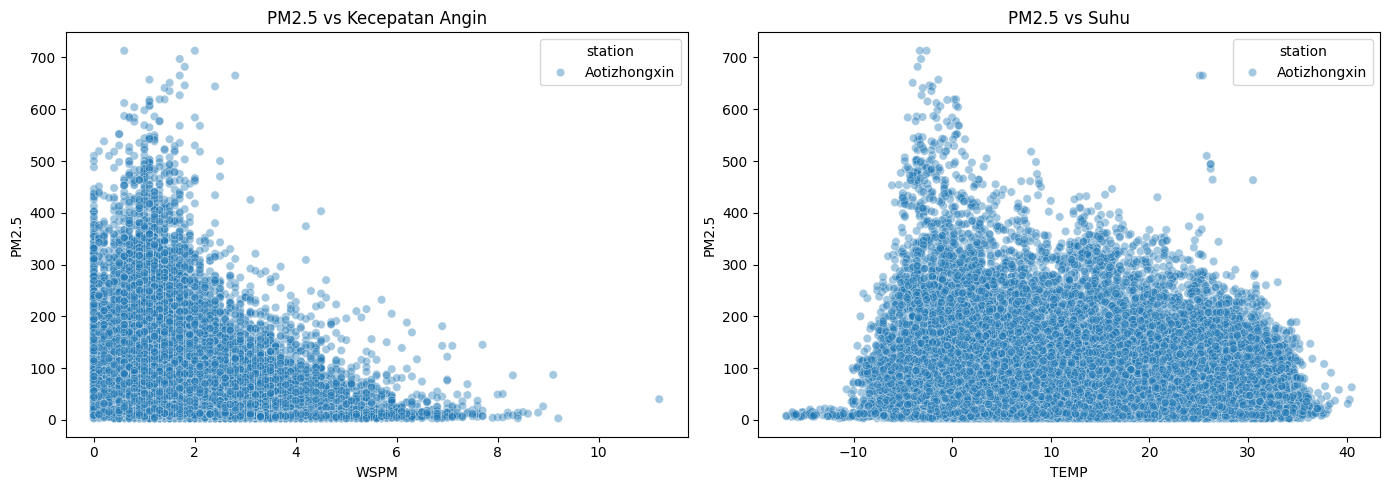

In [39]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='WSPM', y='PM2.5', hue='station', alpha=0.4)
plt.title('PM2.5 vs Kecepatan Angin')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='TEMP', y='PM2.5', hue='station', alpha=0.4)
plt.title('PM2.5 vs Suhu')

plt.tight_layout()
plt.show()

**Insight:**
- Aotizhongxin memiliki puncak PM2.5 yang lebih tinggi dan lebih sering dari Changping.
- Kedua stasiun menunjukkan tren menurun pada pertengahan tahun (musim panas).

## Analisis Lanjutan (Opsional)

In [41]:
# Reload both uploaded datasets
file1_path = "D:/submission/data_1_clean.csv"
file2_path = "D:/submission/data_2_clean.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Show basic info and sample data
df1_info = df1.info()
df2_info = df2.info()
df1_head = df1.head()
df2_head = df2.head()

df1_info, df1_head, df2_info, df2_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31815 entries, 0 to 31814
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31815 non-null  int64  
 1   year     31815 non-null  int64  
 2   month    31815 non-null  int64  
 3   day      31815 non-null  int64  
 4   hour     31815 non-null  int64  
 5   PM2.5    31815 non-null  float64
 6   PM10     31815 non-null  float64
 7   SO2      31815 non-null  float64
 8   NO2      31815 non-null  float64
 9   CO       31815 non-null  float64
 10  O3       31815 non-null  float64
 11  TEMP     31815 non-null  float64
 12  PRES     31815 non-null  float64
 13  DEWP     31815 non-null  float64
 14  RAIN     31815 non-null  float64
 15  wd       31815 non-null  object 
 16  WSPM     31815 non-null  float64
 17  station  31815 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32681 entries, 0 t

(None,
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
 1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
 2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
 3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM       station  
 0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
 1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
 2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
 3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
 4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  ,
 None,
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
 1   2  2013      3    1     1    3.0   3.0   6.0   6.0  30

2025-06-23 15:57:53.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:53.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:53.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:54.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:54.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

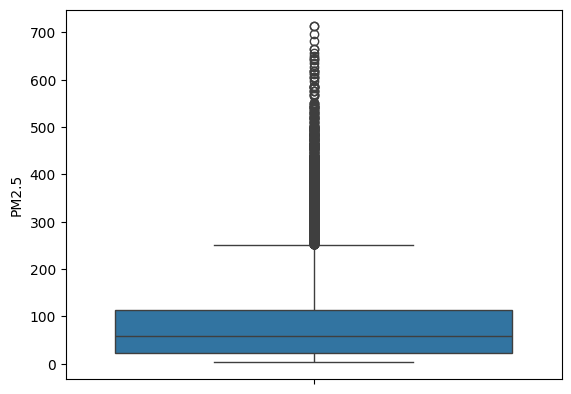

In [42]:
# Boxplot
st.subheader("Distribusi PM2.5")
fig4, ax4 = plt.subplots()
sns.boxplot(data=df_clean, y="PM2.5", ax=ax4)
st.pyplot(fig4)

In [43]:
# Korelasi
st.subheader("Korelasi dengan Cuaca")
corr = df_clean[["PM2.5", "TEMP", "DEWP", "WSPM"]].corr()
st.dataframe(corr.round(2))

2025-06-23 15:57:58.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:58.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:58.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:57:58.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [44]:

# Line chart PM2.5
st.subheader("Tren PM2.5 dari waktu ke waktu")
df_filtered = df_clean.copy()
st.line_chart(df_filtered.set_index("datetime")["PM2.5"])
# Scatter plot PM2.5 vs WSPM
st.subheader("PM2.5 vs Kecepatan Angin")    

2025-06-23 15:58:01.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:01.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:01.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:01.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:01.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:01.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [45]:
# Korelasi
st.subheader("Korelasi dengan Cuaca")
corr = df_filtered[["PM2.5", "TEMP", "DEWP", "WSPM"]].corr()
st.dataframe(corr.round(2))

2025-06-23 15:58:03.467 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:03.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:03.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 15:58:03.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Conclusion

- Conclution pertanyaan 1
: - Aotizhongxin cenderung memiliki tingkat polusi PM2.5 yang lebih tinggi dari Changping.
  - Musim dingin menunjukkan lonjakan signifikan, sedangkan musim panas cenderung lebih bersih.

- Conclution pertanyaan 2
:   - Kecepatan angin (WSPM) berkontribusi besar dalam mengurangi konsentrasi PM2.5.
    - Hubungan dengan suhu dan kelembapan sangat lemah, sehingga pengaruhnya kecil terhadap PM2.5.

-   Secara keseluruhan, lokasi dan faktor cuaca khususnya angin sangat berpengaruh terhadap tingkat pencemaran udara di Beijing.

- Stasiun Aotizhongxin memiliki polusi lebih tinggi dibandingkan Changping.

- PM2.5 berkurang saat kecepatan angin meningkat.

- Tidak ada hubungan kuat antara suhu dan PM2.5.


# Insight tambahan
- Nilai PM2.5 tertinggi biasanya terjadi pada musim dingin, diduga akibat peningkatan aktivitas pemanasan dan kondisi atmosfer yang kurang mendukung dispersi polutan.
- Nilai terendah umumnya terjadi pada musim panas, saat curah hujan dan kecepatan angin lebih tinggi.

# Saran/Rekomendasi
- Saran Rekomendasi:
- Stakeholder dapat meningkatkan pengawasan dan upaya pengendalian polusi udara khususnya pada musim dingin.
- Disarankan untuk memperbanyak ruang terbuka hijau dan memperkuat regulasi emisi pada periode kritis.
- Edukasi masyarakat tentang bahaya polusi udara dan pentingnya menjaga kualitas udara perlu digencarkan, terutama saat periode PM2.5 tinggi.
- Data cuaca dan polusi dapat dimanfaatkan untuk sistem peringatan dini kualitas udara di Beijing.